# CONCRETE STRENGTH ASSIGNMENT

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv('compresive_strength_concrete.csv')

In [8]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [10]:
train_data=data.iloc[0:720,]
test_data=data.iloc[720:1030,]

In [11]:
train_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
715,141.3,212.0,0.0,203.5,0.0,971.8,748.5,90,39.66
716,116.0,173.0,0.0,192.0,0.0,909.8,891.9,7,10.09
717,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3,4.83
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7,10.35


In [12]:
test_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
720,203.5,305.3,0.0,203.5,0.0,963.4,630.0,90,51.86
721,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,3,11.85
722,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,7,17.24
723,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,28,27.83
724,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90,35.76
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [17]:
train_data.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [18]:
test_data.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [19]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [20]:
train_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,2.512152,-0.860203,-0.847856,-0.722826,-0.607993,0.862262,-1.272253,-0.304970,2.410406
1,2.512152,-0.860203,-0.847856,-0.722826,-0.607993,1.074034,-1.272253,-0.304970,1.389774
2,0.476560,0.775698,-0.847856,2.155421,-1.005259,-0.662495,-2.262769,3.264693,0.170655
3,0.476560,0.775698,-0.847856,2.155421,-1.005259,-0.662495,-2.262769,4.666007,0.214638
4,-0.837010,0.659750,-0.847856,0.585468,-1.005259,-0.007414,0.533627,4.592253,0.397901
...,...,...,...,...,...,...,...,...,...
715,-1.399128,1.573558,-0.847856,1.086980,-1.005259,-0.100594,-0.396492,0.609572,0.136258
716,-1.647323,1.125838,-0.847856,0.585468,-1.005259,-0.975917,1.335704,-0.614734,-1.531150
717,-1.399128,1.573558,-0.847856,1.086980,-1.005259,-0.100594,-0.396492,-0.673737,-1.827753
718,-1.582576,1.250970,-0.847856,1.086980,-1.005259,-0.292600,0.226809,-0.614734,-1.516489


In [21]:
test_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
720,-0.788940,2.644642,-0.847856,1.086980,-1.005259,-0.219186,-1.827908,0.609572,0.824198
721,0.255833,-0.860203,-0.847856,0.585468,-1.005259,0.466955,0.587985,-0.673737,-1.431906
722,0.255833,-0.860203,-0.847856,0.585468,-1.005259,0.466955,0.587985,-0.614734,-1.127972
723,0.255833,-0.860203,-0.847856,0.585468,-1.005259,0.466955,0.587985,-0.304970,-0.530818
724,0.255833,-0.860203,-0.847856,0.585468,-1.005259,0.466955,0.587985,0.609572,-0.083657
...,...,...,...,...,...,...,...,...,...
1025,-0.073785,0.471477,0.593338,0.044706,0.409007,-1.536407,-0.157318,-0.304970,0.396773
1026,0.375516,-0.860203,0.997127,0.759907,0.647367,-2.273373,0.387466,-0.304970,-0.341916
1027,-1.328495,0.740110,0.885407,0.615995,-0.035930,-1.221573,-0.015989,-0.304970,-0.763702
1028,-1.224508,1.283114,-0.847856,-0.129733,0.790382,0.150709,0.091519,-0.304970,-0.252259


In [22]:
train_labels=train_data.iloc[:,-1]

In [23]:
test_labels=test_data.iloc[:,-1]

In [25]:
train_labels

0      2.410406
1      1.389774
2      0.170655
3      0.214638
4      0.397901
         ...   
715    0.136258
716   -1.531150
717   -1.827753
718   -1.516489
719    0.356737
Name: Concrete compressive strength(MPa, megapascals) , Length: 720, dtype: float64

In [26]:
test_labels

720     0.824198
721    -1.431906
722    -1.127972
723    -0.530818
724    -0.083657
          ...   
1025    0.396773
1026   -0.341916
1027   -0.763702
1028   -0.252259
1029   -0.273122
Name: Concrete compressive strength(MPa, megapascals) , Length: 310, dtype: float64

In [28]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [29]:
train_data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.512152,-0.860203,-0.847856,-0.722826,-0.607993,0.862262,-1.272253,-0.304970
1,2.512152,-0.860203,-0.847856,-0.722826,-0.607993,1.074034,-1.272253,-0.304970
2,0.476560,0.775698,-0.847856,2.155421,-1.005259,-0.662495,-2.262769,3.264693
3,0.476560,0.775698,-0.847856,2.155421,-1.005259,-0.662495,-2.262769,4.666007
4,-0.837010,0.659750,-0.847856,0.585468,-1.005259,-0.007414,0.533627,4.592253
...,...,...,...,...,...,...,...,...
715,-1.399128,1.573558,-0.847856,1.086980,-1.005259,-0.100594,-0.396492,0.609572
716,-1.647323,1.125838,-0.847856,0.585468,-1.005259,-0.975917,1.335704,-0.614734
717,-1.399128,1.573558,-0.847856,1.086980,-1.005259,-0.100594,-0.396492,-0.673737
718,-1.582576,1.250970,-0.847856,1.086980,-1.005259,-0.292600,0.226809,-0.614734


In [31]:
test_data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
720,-0.788940,2.644642,-0.847856,1.086980,-1.005259,-0.219186,-1.827908,0.609572
721,0.255833,-0.860203,-0.847856,0.585468,-1.005259,0.466955,0.587985,-0.673737
722,0.255833,-0.860203,-0.847856,0.585468,-1.005259,0.466955,0.587985,-0.614734
723,0.255833,-0.860203,-0.847856,0.585468,-1.005259,0.466955,0.587985,-0.304970
724,0.255833,-0.860203,-0.847856,0.585468,-1.005259,0.466955,0.587985,0.609572
...,...,...,...,...,...,...,...,...
1025,-0.073785,0.471477,0.593338,0.044706,0.409007,-1.536407,-0.157318,-0.304970
1026,0.375516,-0.860203,0.997127,0.759907,0.647367,-2.273373,0.387466,-0.304970
1027,-1.328495,0.740110,0.885407,0.615995,-0.035930,-1.221573,-0.015989,-0.304970
1028,-1.224508,1.283114,-0.847856,-0.129733,0.790382,0.150709,0.091519,-0.304970


In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [36]:
k=5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_labels = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_labels,
    epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=1)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
576/576 [==============================] - 1s 881us/step - loss: 0.8127 - mae: 0.7411
Epoch 2/100
576/576 [==============================] - 0s 824us/step - loss: 0.3410 - mae: 0.4579
Epoch 3/100
576/576 [==============================] - 0s 827us/step - loss: 0.1559 - mae: 0.3073
Epoch 4/100
576/576 [==============================] - 0s 825us/step - loss: 0.0700 - mae: 0.2027
Epoch 5/100
576/576 [==============================] - 0s 845us/step - loss: 0.0307 - mae: 0.1276
Epoch 6/100
576/576 [==============================] - 0s 825us/step - loss: 0.0168 - mae: 0.0947
Epoch 7/100
576/576 [==============================] - 0s 831us/step - loss: 0.0111 - mae: 0.0781
Epoch 8/100
576/576 [==============================] - 0s 834us/step - loss: 0.0083 - mae: 0.0684
Epoch 9/100
576/576 [==============================] - 1s 924us/step - loss: 0.0067 - mae: 0.0615
Epoch 10/100
576/576 [==============================] - 1s 937us/step - loss: 0.0055 - mae: 0.0545

576/576 [==============================] - 0s 812us/step - loss: 6.5437e-04 - mae: 0.0197
Epoch 54/100
576/576 [==============================] - 0s 843us/step - loss: 6.4967e-04 - mae: 0.0193
Epoch 55/100
576/576 [==============================] - 0s 799us/step - loss: 6.5180e-04 - mae: 0.0197
Epoch 56/100
576/576 [==============================] - 0s 797us/step - loss: 6.3789e-04 - mae: 0.0197
Epoch 57/100
576/576 [==============================] - 0s 789us/step - loss: 6.7390e-04 - mae: 0.0198
Epoch 58/100
576/576 [==============================] - 0s 794us/step - loss: 6.4246e-04 - mae: 0.0194
Epoch 59/100
576/576 [==============================] - 0s 796us/step - loss: 6.2298e-04 - mae: 0.0191
Epoch 60/100
576/576 [==============================] - 0s 808us/step - loss: 6.1816e-04 - mae: 0.0186
Epoch 61/100
576/576 [==============================] - 0s 803us/step - loss: 5.9764e-04 - mae: 0.0187
Epoch 62/100
576/576 [==============================] - 0s 798us/step - loss: 5.5898e-

Epoch 33/100
576/576 [==============================] - 0s 784us/step - loss: 0.0016 - mae: 0.0287
Epoch 34/100
576/576 [==============================] - 0s 789us/step - loss: 0.0015 - mae: 0.0286
Epoch 35/100
576/576 [==============================] - 0s 822us/step - loss: 0.0015 - mae: 0.0286
Epoch 36/100
576/576 [==============================] - 0s 799us/step - loss: 0.0016 - mae: 0.0291
Epoch 37/100
576/576 [==============================] - 0s 799us/step - loss: 0.0014 - mae: 0.0271
Epoch 38/100
576/576 [==============================] - 0s 798us/step - loss: 0.0015 - mae: 0.0274
Epoch 39/100
576/576 [==============================] - 0s 808us/step - loss: 0.0014 - mae: 0.0265
Epoch 40/100
576/576 [==============================] - 0s 806us/step - loss: 0.0014 - mae: 0.0271
Epoch 41/100
576/576 [==============================] - 0s 806us/step - loss: 0.0014 - mae: 0.0265
Epoch 42/100
576/576 [==============================] - 0s 799us/step - loss: 0.0014 - mae: 0.0267
Epoch 43/1

Epoch 13/100
576/576 [==============================] - 0s 792us/step - loss: 0.0041 - mae: 0.0451
Epoch 14/100
576/576 [==============================] - 0s 792us/step - loss: 0.0035 - mae: 0.0430
Epoch 15/100
576/576 [==============================] - 0s 787us/step - loss: 0.0034 - mae: 0.0414
Epoch 16/100
576/576 [==============================] - 0s 787us/step - loss: 0.0029 - mae: 0.0370
Epoch 17/100
576/576 [==============================] - 0s 801us/step - loss: 0.0026 - mae: 0.0371
Epoch 18/100
576/576 [==============================] - 0s 806us/step - loss: 0.0025 - mae: 0.0358
Epoch 19/100
576/576 [==============================] - 0s 803us/step - loss: 0.0023 - mae: 0.0334
Epoch 20/100
576/576 [==============================] - 0s 805us/step - loss: 0.0021 - mae: 0.0328
Epoch 21/100
576/576 [==============================] - 0s 799us/step - loss: 0.0018 - mae: 0.0312
Epoch 22/100
576/576 [==============================] - 1s 1ms/step - loss: 0.0018 - mae: 0.0320
Epoch 23/100

576/576 [==============================] - 0s 825us/step - loss: 6.5474e-04 - mae: 0.0193
Epoch 74/100
576/576 [==============================] - 0s 811us/step - loss: 6.4908e-04 - mae: 0.0193
Epoch 75/100
576/576 [==============================] - 0s 805us/step - loss: 5.9371e-04 - mae: 0.0187
Epoch 76/100
576/576 [==============================] - 0s 805us/step - loss: 6.0450e-04 - mae: 0.0184
Epoch 77/100
576/576 [==============================] - 0s 834us/step - loss: 6.1784e-04 - mae: 0.0193
Epoch 78/100
576/576 [==============================] - 0s 834us/step - loss: 6.0329e-04 - mae: 0.0183
Epoch 79/100
576/576 [==============================] - 1s 871us/step - loss: 6.4154e-04 - mae: 0.0189
Epoch 80/100
576/576 [==============================] - 1s 1ms/step - loss: 5.7913e-04 - mae: 0.0183
Epoch 81/100
576/576 [==============================] - 1s 1ms/step - loss: 5.5776e-04 - mae: 0.0183
Epoch 82/100
576/576 [==============================] - 0s 857us/step - loss: 5.8253e-04 -

In [37]:
all_scores

[0.03615274652838707,
 0.023547235876321793,
 0.026165926828980446,
 0.009853570722043514,
 0.05618184059858322]

In [39]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_labels = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_labels,validation_data=(val_data, val_labels),epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [40]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

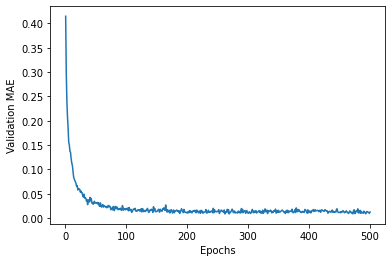

In [41]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

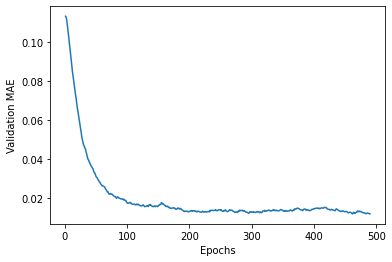

In [43]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)

plt.xlabel('Epochs')

plt.ylabel('Validation MAE')

plt.show()

In [44]:
model=build_model()
model.fit(train_data,train_labels,epochs=500)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

Epoch 1/500
23/23 [==============================] - 0s 2ms/step - loss: 0.8493 - mae: 0.7592
Epoch 2/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6637 - mae: 0.6716
Epoch 3/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5151 - mae: 0.5783
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4224 - mae: 0.5111
Epoch 5/500
23/23 [==============================] - 0s 1ms/step - loss: 0.3492 - mae: 0.4571
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.2769 - mae: 0.4099
Epoch 7/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2107 - mae: 0.3638
Epoch 8/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1682 - mae: 0.3292
Epoch 9/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1422 - mae: 0.3022
Epoch 10/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1250 - mae: 0.2840
Epoch 11/500
23/23 [==============================] - 0s 1m

23/23 [==============================] - 0s 2ms/step - loss: 4.9483e-04 - mae: 0.0176
Epoch 170/500
23/23 [==============================] - 0s 2ms/step - loss: 4.8170e-04 - mae: 0.0172
Epoch 171/500
23/23 [==============================] - 0s 2ms/step - loss: 4.4604e-04 - mae: 0.0162
Epoch 172/500
23/23 [==============================] - 0s 1ms/step - loss: 5.2551e-04 - mae: 0.0167
Epoch 173/500
23/23 [==============================] - 0s 2ms/step - loss: 4.6382e-04 - mae: 0.0165
Epoch 174/500
23/23 [==============================] - 0s 2ms/step - loss: 5.0386e-04 - mae: 0.0174
Epoch 175/500
23/23 [==============================] - 0s 2ms/step - loss: 5.1986e-04 - mae: 0.0171
Epoch 176/500
23/23 [==============================] - 0s 2ms/step - loss: 4.5404e-04 - mae: 0.0162
Epoch 177/500
23/23 [==============================] - 0s 1ms/step - loss: 3.8456e-04 - mae: 0.0154
Epoch 178/500
23/23 [==============================] - 0s 2ms/step - loss: 4.7210e-04 - mae: 0.0165
Epoch 179/500


23/23 [==============================] - 0s 1ms/step - loss: 2.7769e-04 - mae: 0.0121
Epoch 332/500
23/23 [==============================] - 0s 1ms/step - loss: 2.6210e-04 - mae: 0.0128
Epoch 333/500
23/23 [==============================] - 0s 1ms/step - loss: 2.6068e-04 - mae: 0.0112
Epoch 334/500
23/23 [==============================] - 0s 1ms/step - loss: 2.6052e-04 - mae: 0.0114
Epoch 335/500
23/23 [==============================] - 0s 1ms/step - loss: 2.8207e-04 - mae: 0.0131
Epoch 336/500
23/23 [==============================] - 0s 1ms/step - loss: 2.7851e-04 - mae: 0.0132
Epoch 337/500
23/23 [==============================] - 0s 1ms/step - loss: 2.5000e-04 - mae: 0.0117
Epoch 338/500
23/23 [==============================] - 0s 1ms/step - loss: 2.8883e-04 - mae: 0.0130
Epoch 339/500
23/23 [==============================] - 0s 1ms/step - loss: 2.9329e-04 - mae: 0.0133
Epoch 340/500
23/23 [==============================] - 0s 1ms/step - loss: 2.6856e-04 - mae: 0.0117
Epoch 341/500


23/23 [==============================] - 0s 1ms/step - loss: 2.7015e-04 - mae: 0.0129
Epoch 414/500
23/23 [==============================] - 0s 1ms/step - loss: 2.0270e-04 - mae: 0.0095
Epoch 415/500
23/23 [==============================] - 0s 2ms/step - loss: 2.3754e-04 - mae: 0.0115
Epoch 416/500
23/23 [==============================] - 0s 1ms/step - loss: 1.8745e-04 - mae: 0.0098
Epoch 417/500
23/23 [==============================] - 0s 1ms/step - loss: 2.6173e-04 - mae: 0.0122
Epoch 418/500
23/23 [==============================] - 0s 1ms/step - loss: 1.3929e-04 - mae: 0.0086
Epoch 419/500
23/23 [==============================] - 0s 1ms/step - loss: 2.8750e-04 - mae: 0.0126
Epoch 420/500
23/23 [==============================] - 0s 1ms/step - loss: 2.3411e-04 - mae: 0.0117
Epoch 421/500
23/23 [==============================] - 0s 1ms/step - loss: 2.2505e-04 - mae: 0.0118
Epoch 422/500
23/23 [==============================] - 0s 1ms/step - loss: 1.8028e-04 - mae: 0.0101
Epoch 423/500


In [45]:
test_mae_score

0.024873029440641403

In [48]:
pred=model.predict(test_data)

In [49]:
act=test_labels

In [51]:
pred.ravel()-act.ravel()

array([-0.04048572, -0.00980655, -0.00962836, -0.00644853, -0.0278213 ,
       -0.02310069, -0.0085684 , -0.00837443, -0.00696503, -0.01987564,
       -0.03342123, -0.00699398, -0.006306  , -0.00022059, -0.0279615 ,
       -0.03048554, -0.00964421, -0.00669275, -0.00785371, -0.00486767,
       -0.01560581, -0.03444133, -0.04960963, -0.01110672, -0.00824499,
       -0.00502847,  0.00863565, -0.03470093,  0.00145338,  0.01332244,
       -0.02095234, -0.04770066, -0.05743461, -0.06772293, -0.07084292,
       -0.08225712, -0.11771826, -0.00900916, -0.00854221, -0.00733249,
       -0.00620036, -0.02001425, -0.06877506, -0.00635814, -0.00707199,
       -0.00737283, -0.00626035, -0.01095315, -0.02657159, -0.0304391 ,
       -0.00712815, -0.00958018, -0.00543251, -0.01085558,  0.00013265,
       -0.0051841 , -0.00648606, -0.00769842, -0.00855008, -0.0053795 ,
       -0.00656699, -0.00907107, -0.00616673,  0.03168172, -0.01196663,
       -0.00933993, -0.00858436, -0.02340156, -0.00693527, -0.00